### Checkpoint 1
A partir do dataset enviado, responda:

Importação e Análise Inicial

Importe o arquivo CSV.(0,33)

Quantas linhas tem o dataset?(0,33)

Quantas colunas tem o dataset?(0,33)

Quais colunas têm o tipo object?(0,34)

Quais colunas têm o tipo int64?(0,34)

Existe alguma coluna de outro tipo?(0,33)

## Análise Estatística

Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)

Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)

Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

##Análise de Categorias

Qual a category mais presente? E quantos valores únicos ela possui?(0,5)

Qual a main_category mais presente? E quantos valores únicos ela possui?(0,5)

Qual a currency mais presente? E quantos valores únicos ela possui?(0,5)

Execute o processo de dummy na coluna country.(0,5)

## Análise de Valores Nulos

Qual a quantidade de valores nulos em cada feature?(0,66)

Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)

Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

## Visualização Gráfica
Visualização Gráfica da feature state.(2)

In [29]:
#Importando Biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importe o arquivo CSV.(0,33)

Informações sobre Atributos

1 - Idade: idade do paciente [anos]

2 - Sexo: sexo do paciente [M: Masculino, F: Feminino]

3 - ChestPainType: tipo de dor torácica [AT: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginal, ASY: Assintomático]

4 - RESSINGPAIN: pressão arterial em repouso [mm Hg]

5  - Colesterol: colesterol sérico [mm/dl]

6 - FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]

7 - RESSINGECG: resultados de eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]

8 - MaxHR: frequência cardíaca máxima atingida [valor numérico entre 60 e 202]

9 - ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]

10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]

11 - ST_Slope: a inclinação do pico do segmento ST do exercício [Up: ascendente, Flat: plano, Down: descendente]

12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]

Fonte:https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [30]:
#Importando Dados
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
# função shape para descobrir núemro de linhas e colunas do df.
df.shape

(918, 12)

### Quantas linhas tem o dataset?(0,33)

O dataset possui 918 linhas.

### Quantas colunas tem o dataset?(0,33)

O dataset possui 12 colunas.

In [32]:
# Função info para exploar as tipo de colunas.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Quais colunas têm o tipo object?(0,34)

As colunas Sex, ChestPainType, RestingECG, ExerciseAngina e ST_Slope são do tipo object.

### Quais colunas têm o tipo int64?(0,34)

As colunas Age, RestingBP, Cholesterol, FastingBS, MaxHR e HeartDisease são do tipo inteiro (int).

### Existe alguma coluna de outro tipo?(0,33)

Sim. A coluna Oldpeak é do tipo float64.

In [33]:
#Função describe para exibir dados estatisticos do dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Análise Estatística

### Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)


### Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)

### Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)
Coluna Age - Max:77, Min:28, Primeiro Quartil (25%): 47, Terceiro Quartil (75%): 60

Coluna RestingBP - Max:200, Min:0, Primeiro Quartil (25%): 120, Terceiro Quartil (75%): 140

Coluna Cholesterol - Max:603, Min:0, Primeiro Quartil (25%): 173,25, Terceiro Quartil (75%): 267

Coluna MaxHR - Max:202, Min:60, Primeiro Quartil (25%): 120, Terceiro Quartil (75%): 156

Coluna Oldpeak - Max:6.2, Min:-2.6, Primeiro Quartil (25%): 0, Terceiro Quartil (75%): 1.5

In [34]:
# Função value_count para verificar as categorias 
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [35]:
# Gerar as colunas one-hot
df_one_hot = pd.get_dummies(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']], drop_first='False', dtype=int)

# Remover as colunas originais
df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)

# Concatenar as novas colunas codificadas
df_novo = pd.concat([df, df_one_hot], axis=1)
df_novo.shape

(918, 16)

## Análise de Categorias

Qual a category mais presente? E quantos valores únicos ela possui?(0,5)

Categoria 1 = doença cardíaca é mais presente com 508 aparições.

Execute o processo de dummy na coluna country.(0,5)

In [36]:
df_novo.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [ ]:
# Função isnull para verificar os valores nulos
df_novo.isnull().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

## Análise de Valores Nulos

### Qual a quantidade de valores nulos em cada feature?(0,66)

### Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)

### Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

Não há valores nulos na base selacionada.

## Visualização Gráfica
Visualização Gráfica da feature state.(2)

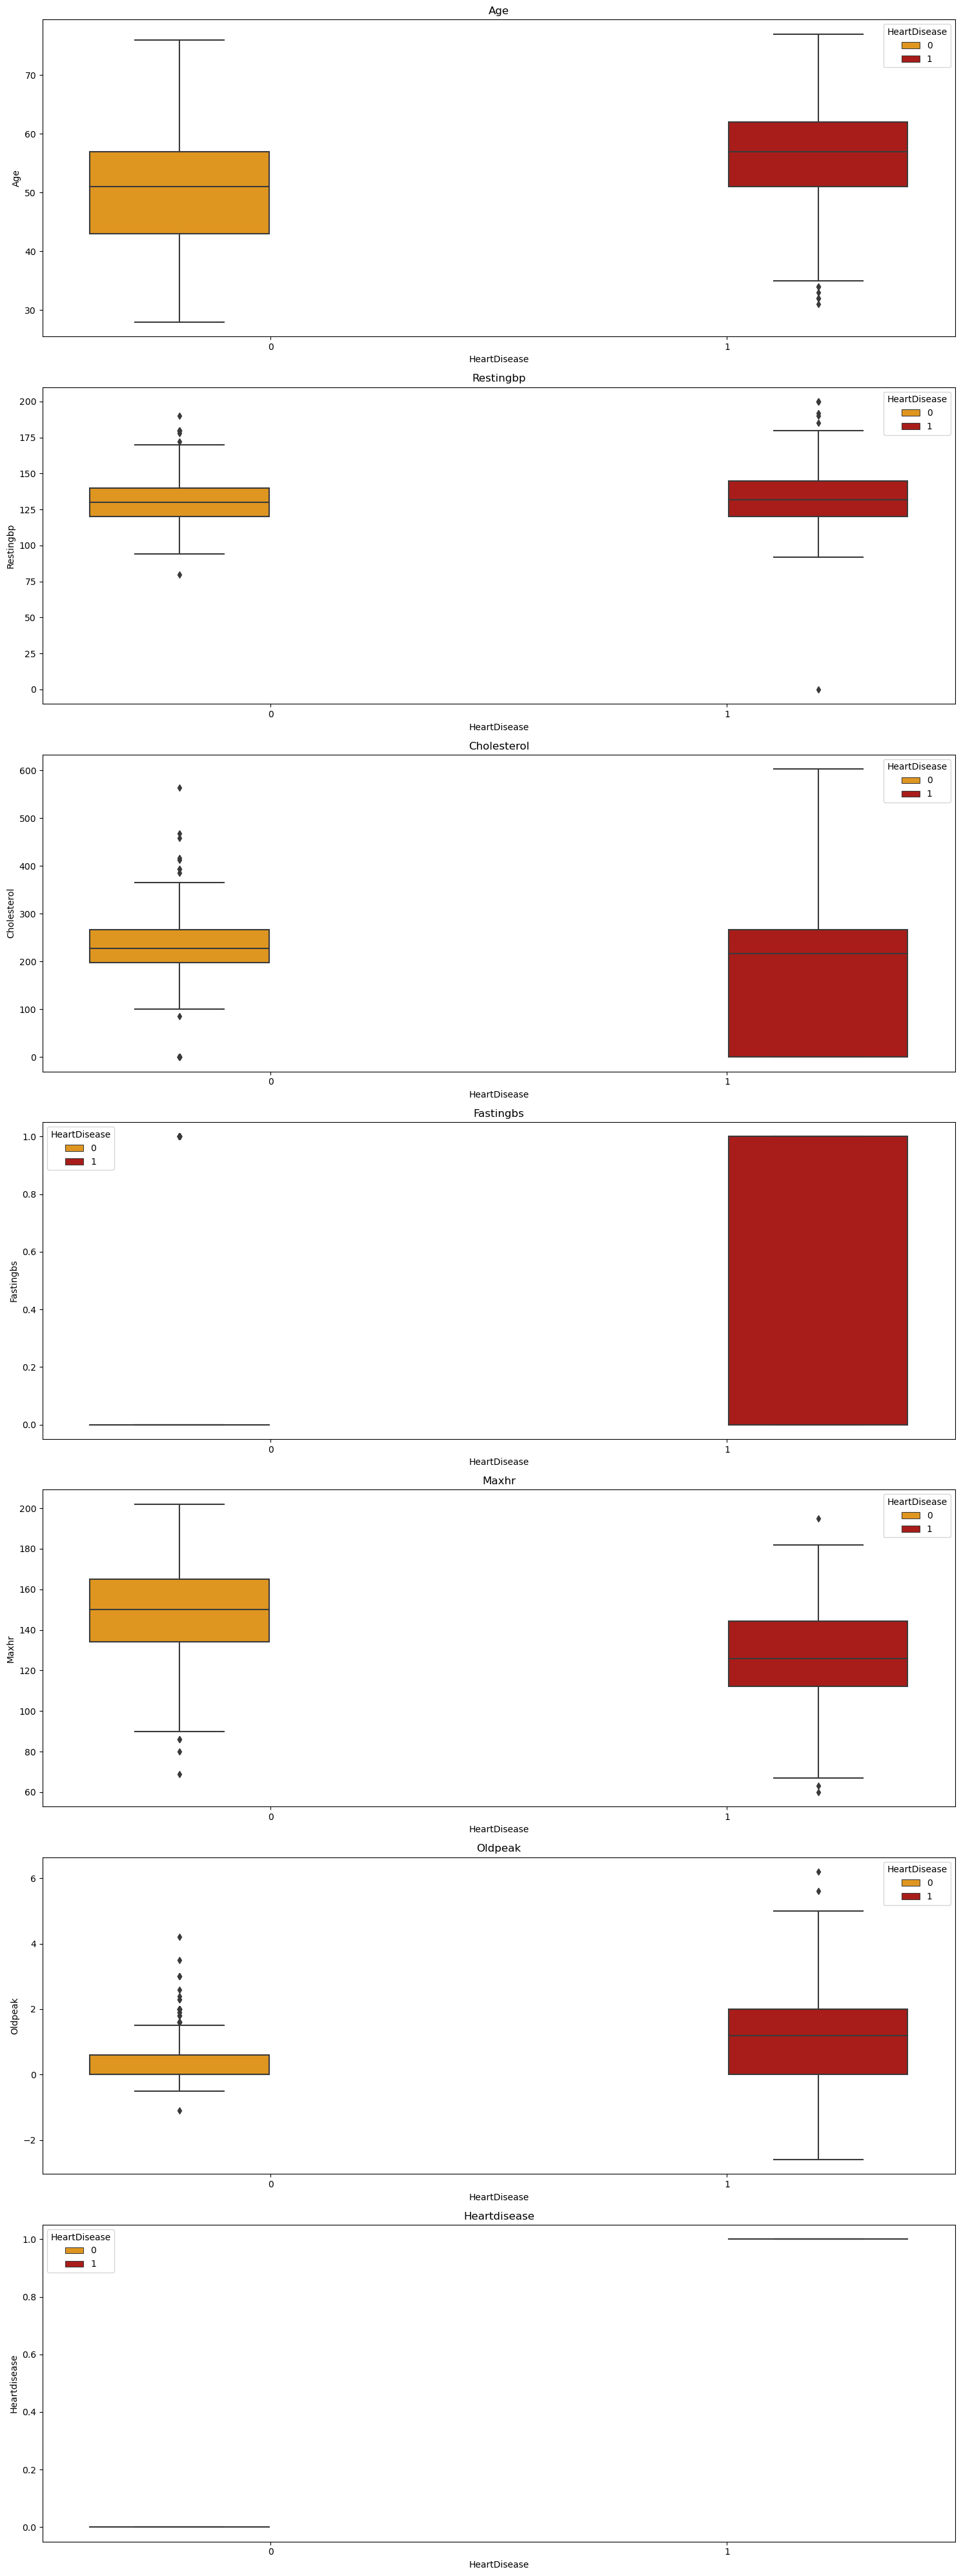

In [38]:
x_values = df.select_dtypes(include=[np.number])
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 40))
for i, x_value in enumerate(x_values):
    ax = axes.flatten()[i] 
    sns.boxplot(data=df, x='HeartDisease', y=x_value, hue='HeartDisease', ax=ax,palette=["#ff9e00", "#bf0603"])
    ax.set_title(f'{x_value.capitalize()}')
    ax.set_ylabel(x_value.capitalize())
plt.tight_layout()
plt.show()

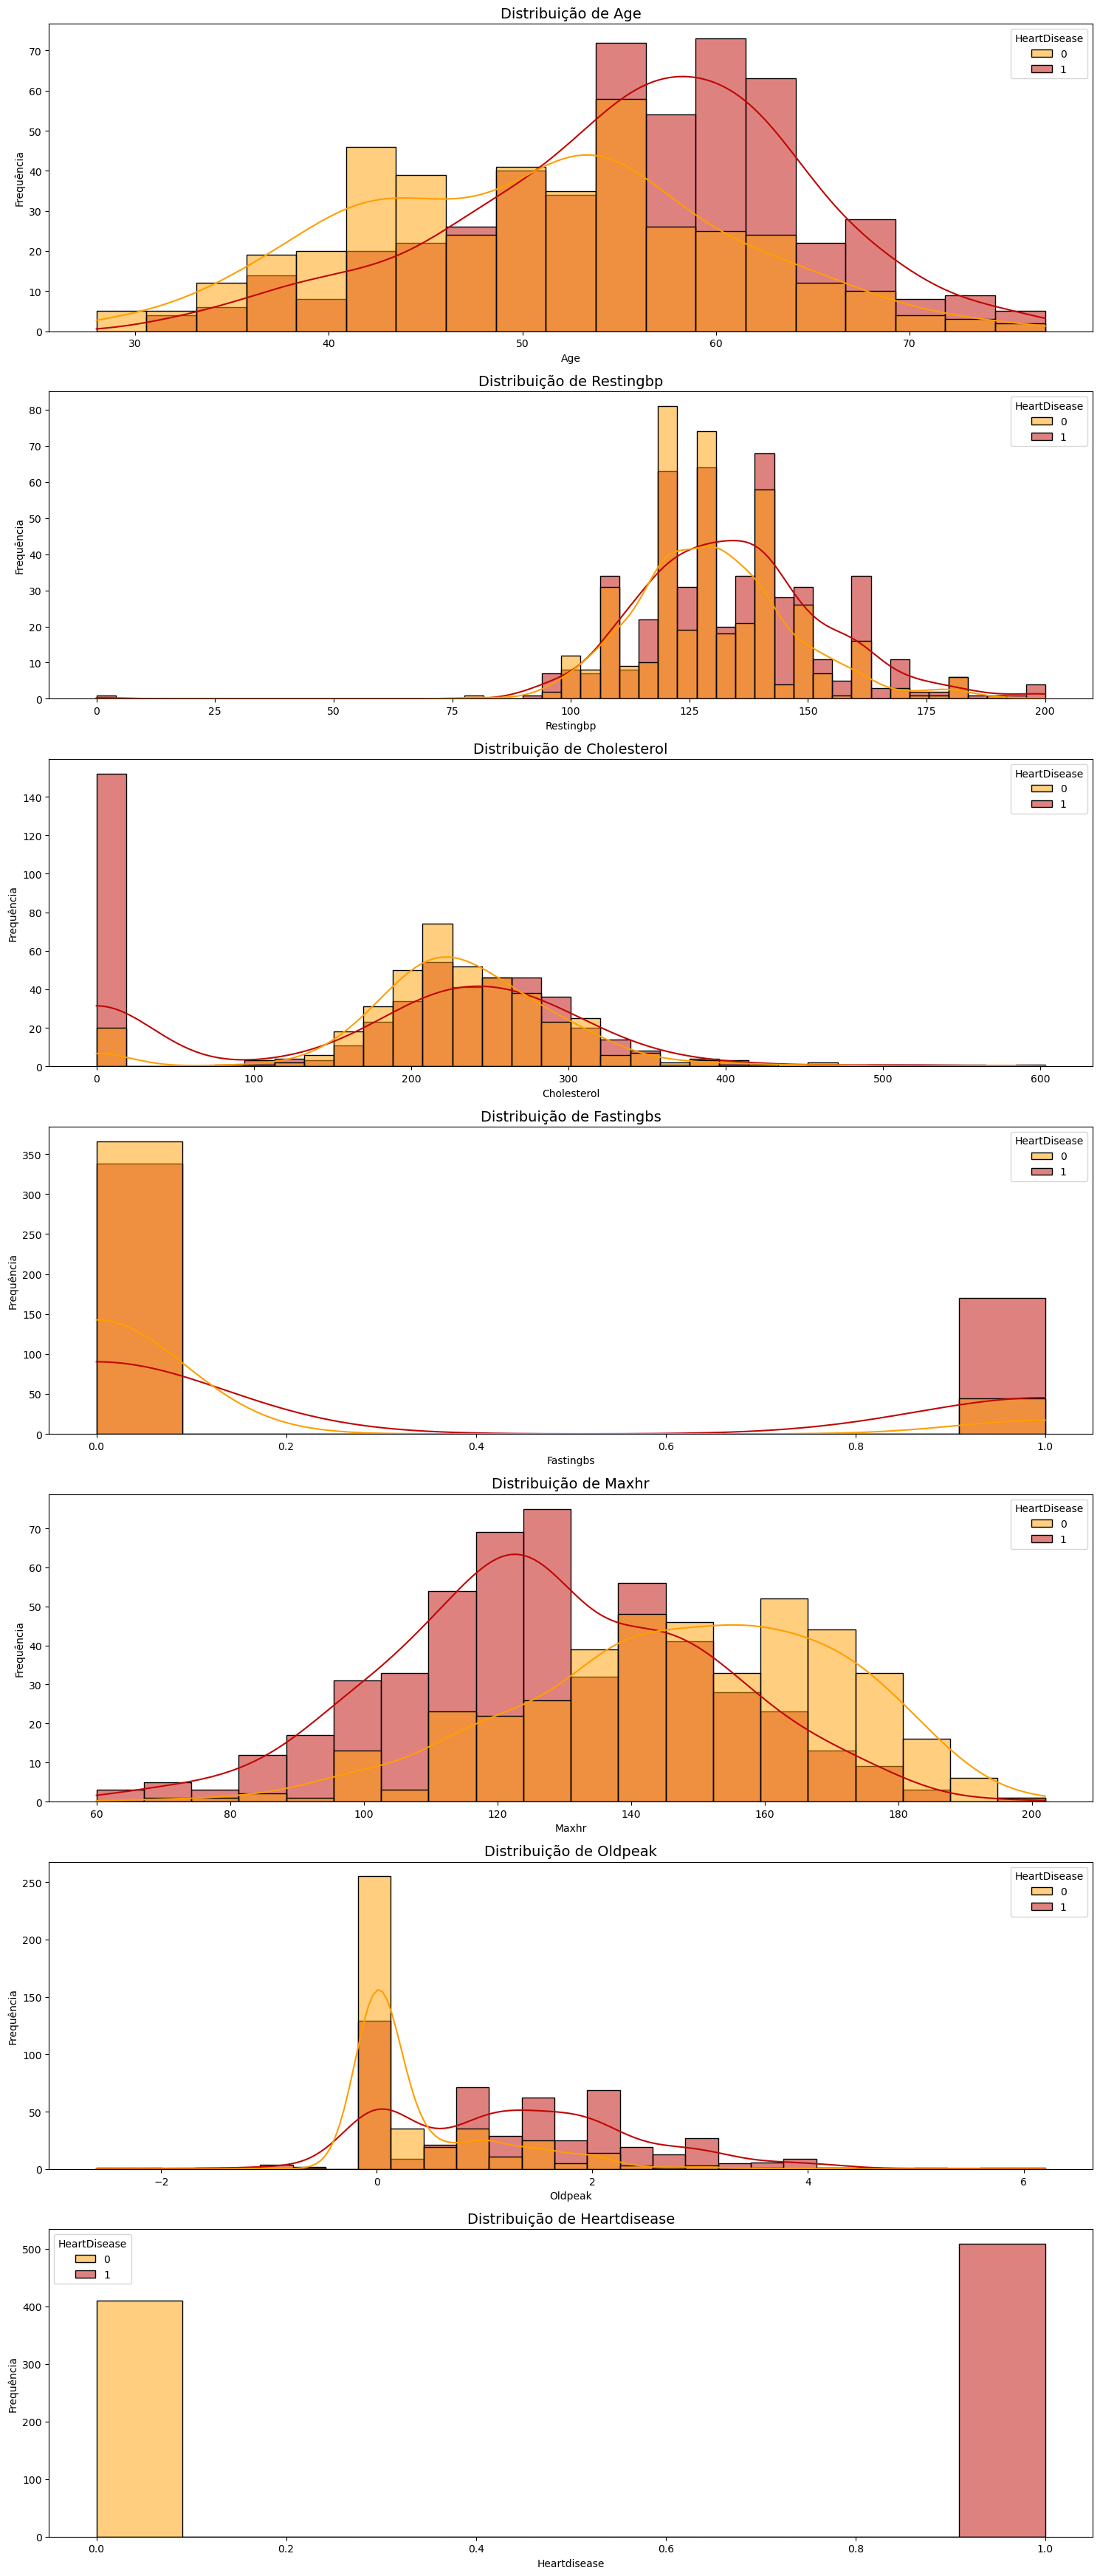

In [41]:
# Seleciona os nomes das colunas numéricas
x_values = df.select_dtypes(include=[np.number]).columns

# Cria subplots em uma única figura
fig, axes = plt.subplots(nrows=len(x_values), ncols=1, figsize=(15, 5 * len(x_values)))

# Gera um histograma para cada variável numérica
for i, x_value in enumerate(x_values):
    ax = axes[i]
    sns.histplot(data=df, x=x_value, hue='HeartDisease', kde=True, ax=ax, palette=["#ff9e00", "#bf0603"])
    ax.set_title(f'Distribuição de {x_value.capitalize()}', fontsize=14)
    ax.set_xlabel(x_value.capitalize())
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()
